In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [2]:
file_names = glob.glob("??????.csv")
print(file_names )
file_names
nas = []
nalengths = []
total = 0
abcnt = 0
normal_dfs = []
for f_name in file_names:
  df = pd.read_csv(f_name)
  
  #print(df.count(axis=0))
  if df.count(axis=0)['적산유량보정값']/df.shape[0] <= 0.9:
    print("wat")
    abcnt += 1
    continue;
  total += df.shape[0]
  nas.append(df.shape[0]-df.count(axis=0)['적산유량보정값'])
  #assert(False)
  if (df.shape[0] == df.count(axis=0)['적산유량보정값']):
    normal_dfs.append(df)
  else:
    #print(f_name)
    #assert(False)
    nacnt = 0
    for i in range(df.shape[0]):
      if pd.isna(df.iloc[i]['적산유량보정값']):
        nacnt += 1
      elif nacnt != 0:
        nalengths.append(nacnt)
        nacnt = 0
    if nacnt != 0:
      nalengths.append(nacnt)
  

['703049.csv', '703068.csv', '703089.csv', '703131.csv', '703167.csv', '703174.csv', '703176.csv', '703180.csv', '703182.csv', '703183.csv', '703187.csv', '703193.csv', '703194.csv', '703195.csv', '703197.csv', '703198.csv', '703199.csv', '703201.csv', '703204.csv', '703207.csv', '703208.csv', '703210.csv', '703211.csv', '703212.csv', '703213.csv', '703216.csv', '703219.csv', '703223.csv', '703231.csv', '703232.csv', '703236.csv', '703238.csv', '703239.csv', '703240.csv', '703246.csv', '703248.csv', '703249.csv', '703250.csv', '703252.csv', '703253.csv', '703254.csv', '703257.csv', '703258.csv', '703259.csv', '703266.csv', '703268.csv', '703269.csv', '703271.csv', '703272.csv', '704669.csv', '704670.csv', '704671.csv', '704672.csv', '704673.csv', '704680.csv', '704681.csv', '704682.csv', '704683.csv', '704684.csv', '704691.csv', '704692.csv', '704693.csv', '704694.csv', '704695.csv', '704702.csv', '704703.csv', '704704.csv', '704705.csv', '704706.csv', '704713.csv', '704714.csv', '7047

wat


샘플 3003575개 중 NaN 값 11784 개
비율 0.003923324704726867
정상 csv: 391
너무많은 nan csv: 195
총 데이터 개수:  682


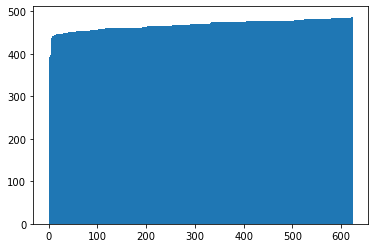

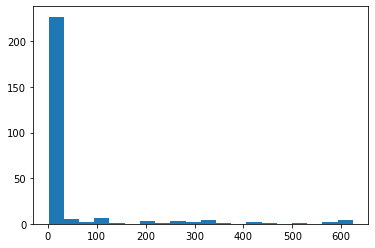

[6, 248, 2, 36, 6, 7, 6, 117, 98, 22, 22, 422, 102, 46, 6, 6, 6, 4, 2, 2, 6, 6, 4, 12, 6, 6, 434, 4, 7, 6, 7, 2, 2, 6, 86, 6, 6, 354, 6, 6, 312, 6, 7, 6, 6, 6, 6, 6, 12, 5, 6, 6, 6, 5, 84, 6, 6, 18, 6, 6, 6, 6, 18, 6, 6, 12, 6, 6, 6, 6, 6, 12, 12, 6, 6, 6, 12, 6, 1, 1, 1, 1, 6, 6, 6, 6, 2, 2, 2, 2, 2, 16, 10, 2, 2, 2, 16, 8, 2, 2, 8, 6, 4, 4, 6, 14, 6, 10, 32, 2, 28, 18, 2, 14, 16, 6, 274, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 2, 6, 6, 36, 468, 6, 6, 624, 580, 620, 333, 616, 616, 570, 2, 333, 332, 524, 6, 108, 2, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 208, 2, 6, 2, 4, 2, 2, 6, 2, 2, 202, 6, 57, 192, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 6, 2, 4, 6, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 102, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 4, 7, 15, 6, 7, 156, 2, 316, 6, 6, 6, 6, 6, 6, 6, 12, 6, 6, 6, 6, 6, 6, 267, 106, 269, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 40, 310]


In [3]:

print("샘플 {0}개 중 NaN 값 {1} 개".format(total,sum(nas)))
print("비율", sum(nas)/total)
print("정상 csv:", len(normal_dfs))
print("너무많은 nan csv:", abcnt)
print("총 데이터 개수: ", len(file_names))
plt.hist(nas, 1000, cumulative=1)
plt.show()
plt.hist(nalengths, 20)
plt.show()
print(nalengths)

In [9]:
origin_nalengths = nalengths.copy()

nalengths = []

for nl in origin_nalengths:
  if nl < 6:
    nalengths.append(nl)
print(nalengths)


[2, 4, 2, 2, 4, 4, 2, 2, 5, 5, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2]


In [18]:
nalengths = np.array(nalengths)
hist = [np.sum(nalengths==i)/len(nalengths) for i in range(1,6)]
print (hist)


[0.045871559633027525, 0.8073394495412844, 0.0, 0.12844036697247707, 0.01834862385321101]


In [ ]:



MSE = 0.0
MSE_cnt = 0
MSE2 = 0.0
MSE3 = 0.0
MSE4 = 0.0
MSE5 = 0.0
for i in range(50000):
  ridx = np.random.randint(0, len(nalengths))
  nalen = nalengths[ridx]
  normal_idx = np.random.randint(0, len(normal_dfs))
  ndf = normal_dfs[normal_idx].copy()
  if ndf.shape[0]-10-nalen < 0:
    continue;
  start_at = np.random.randint(0, ndf.shape[0]-10-nalen)
  data = ndf.iloc[start_at:start_at+10+nalen]['적산유량보정값'].copy()
  #print(data)
  original = data.copy()
  
  data[5:-5] = np.nan
  print(data)
  after_intp = data.interpolate("linear")
  print(after_intp)
  #assert(False)
  for j in range(0, nalen):
    MSE += (after_intp.iloc[5+j] - original.iloc[5+j])**2
    MSE_cnt += 1
  data[5:-5] = np.nan
  
  #print(data)
  after_intp = data.interpolate("quadratic")
  for j in range(0, nalen):
    MSE2 += (after_intp.iloc[5+j] - original.iloc[5+j])**2
    
  data[5:-5] = np.nan
  #print(data)
  after_intp = data.interpolate("cubic")
  for j in range(0, nalen):
    MSE3 += (after_intp.iloc[5+j] - original.iloc[5+j])**2
  #print(original)
  #assert(False)
  
  data[5:-5] = np.nan
  #print(data)
  LR = linear_model.LinearRegression()
  x = np.array([i for i in range(5)] + [data.shape[0]-5+i for i in range(5)]).reshape(-1, 1)
  LR.fit(x, data.iloc[x.reshape([-1])])
  after_intp = LR.predict([[i] for i in range(data.shape[0])])
  #print(after_intp)
  for j in range(0, nalen):
    MSE4 += (after_intp[5+j] - original.iloc[5+j])**2
  
  #data[5:-5] = np.nan
   
  print(data)
  LR = linear_model.LinearRegression()
  x = np.array([[i for i in range(5)] + [data.shape[0]-5+i for i in range(5)]]).reshape(-1, 1)
  PF = PolynomialFeatures(degree=2)
  x_poly = PF.fit_transform(x)
  LR.fit(x_poly, data.iloc[x.reshape([-1])])
  after_intp = LR.predict(PF.fit_transform([[i] for i in range(data.shape[0])]))
  print(after_intp)
  for j in range(0, nalen):
    MSE5 += (after_intp[5+j] - original.iloc[5+j])**2
  #assert(False)
    
MSE /= MSE_cnt
MSE2 /= MSE_cnt
MSE3 /= MSE_cnt
MSE4 /= MSE_cnt
MSE5 /= MSE_cnt

print(MSE)
print(MSE2)
print(MSE3)
print(MSE4)
print(MSE5)

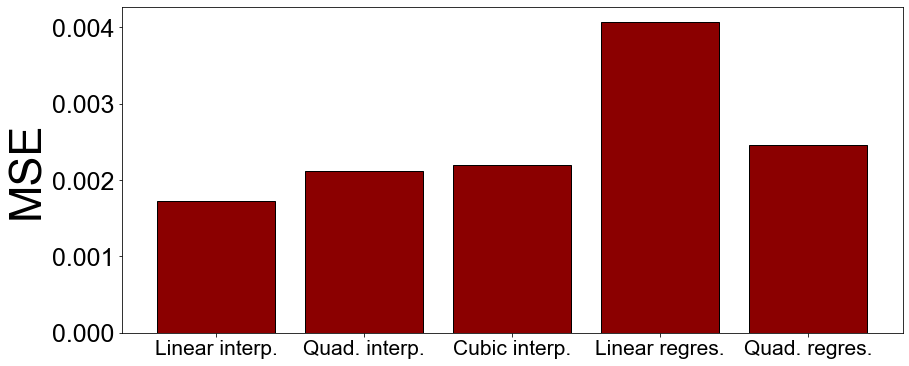

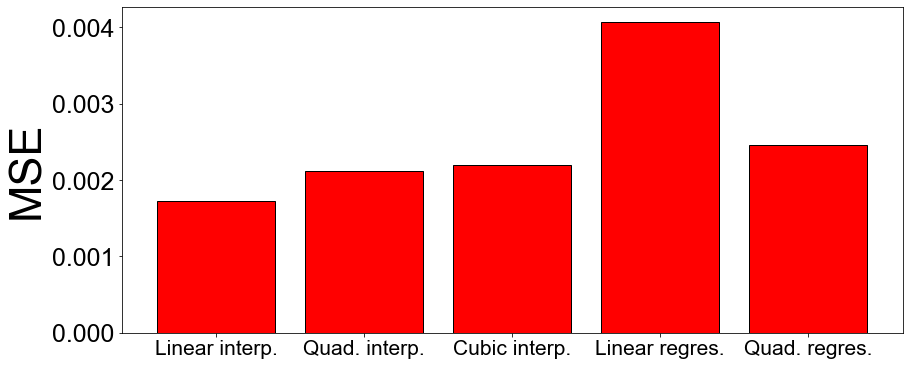

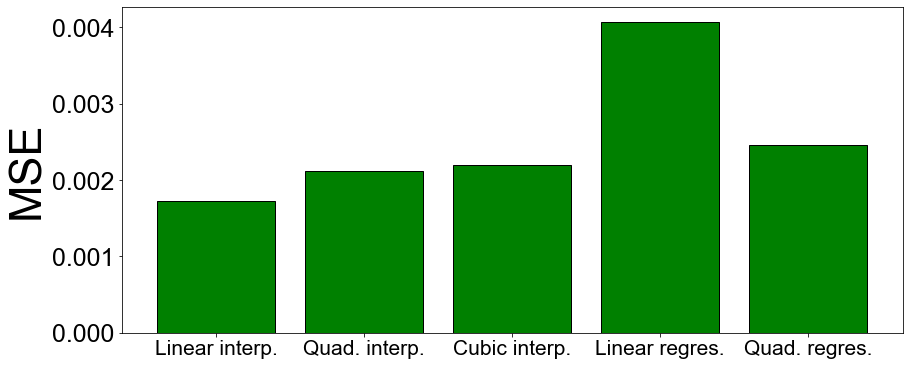

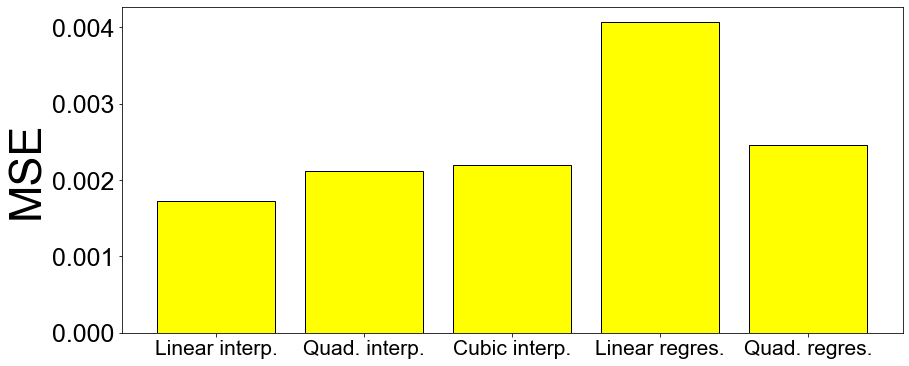

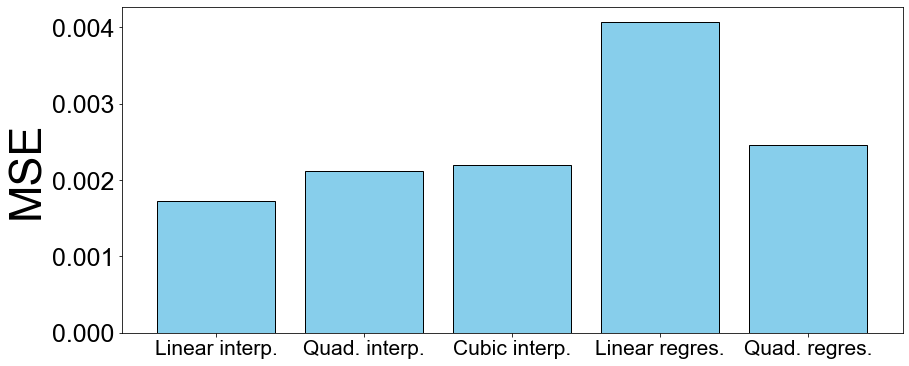

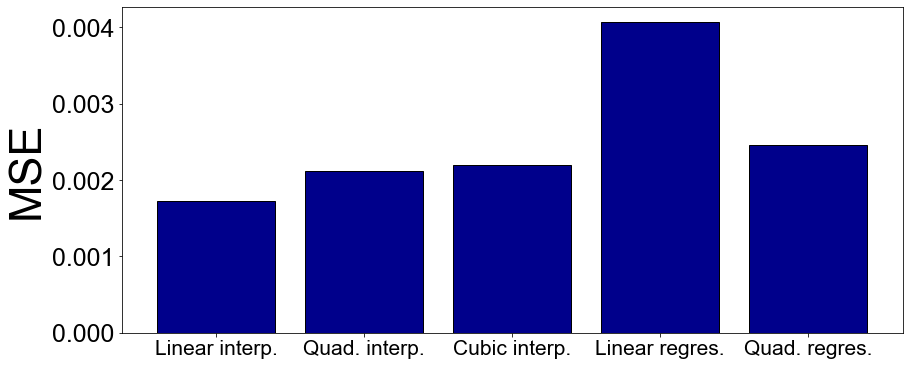

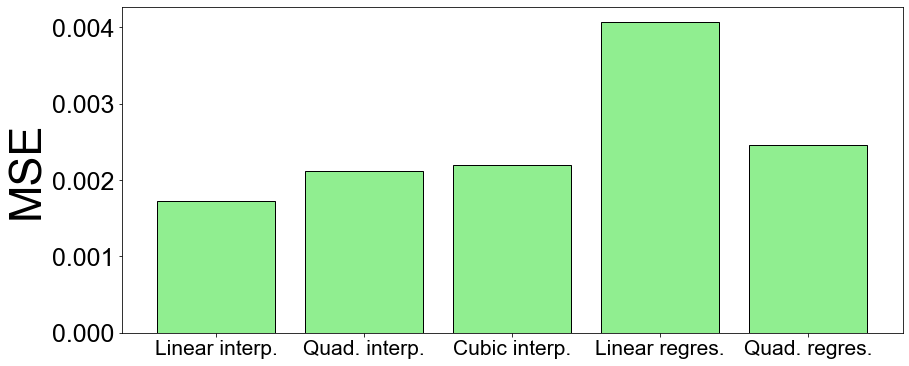

['선형보간', '이차보간', '삼차보간', '선형회귀', '이차회귀']
[0.001725748307980575, 0.0021219705874349817, 0.0021959359694578512, 0.004065223499238332, 0.0024562568357817693]


In [8]:

import matplotlib.font_manager as fm

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
#fpath = 'arial.ttf'



#prop = fm.FontProperties(fname =fpath)

for cl in ['darkred', 'red', 'green', 'yellow', 'skyblue', 'darkblue', 'lightgreen']:
  plt.figure(figsize=[14, 6])
  x = list(range(5))
  plt.bar(x, [MSE, MSE2, MSE3, MSE4, MSE5], color=cl, ec="k")
  #plt.xticks(x ,["선형보간", "이차보간", "삼차보간", "선형회귀", "이차회귀"])
  plt.xticks(x,
             ["Linear interp.", "Quad. interp.", "Cubic interp.", "Linear regres.", "Quad. regres."],
             #fontproperties=prop, 
             size=21)
  plt.yticks(np.arange(0, 0.0045, 0.001),
             #fontproperties=prop,
             size=25)
  plt.ylabel("MSE",
             #fontproperties=prop,
             size=45)
  #plt.title("보간법 별 MSE(Mean Square Error)")
  #plt.yscale('log')
  plt.savefig("value_estimation_arial_"+cl+".png")
  plt.savefig("value_estimation_arial_"+cl+".eps", format="eps")
  plt.show()
print(["선형보간", "이차보간", "삼차보간", "선형회귀", "이차회귀"])
print([MSE, MSE2, MSE3, MSE4, MSE5])

In [6]:
df = pd.read_csv("704670.csv")
df

,Unnamed: 0,수용가번호,순번,지점,측정시간,미터기번호,적산유량지시값,상태코드,미터구경,미터배터리,ami배터리,sqn,수신감도지시값,ami일시,시간간격,적산유량보정값,구간유량보정값,지침값오프셋,snr,수신횟수
0,25156,704670,0,703624,2020-05-14 19:00:00.000000,90-000001,0.236,0,15.0,NaN,0.0,NaN,-60,NaN,NaN,0.236,NaN,0.0,6,1
1,25253,704670,1,703624,2020-05-14 20:00:00.000000,90-000001,0.236,0,15.0,NaN,0.0,NaN,-60,NaN,1.0,0.236,0.000,0.0,6,1
2,25363,704670,2,703624,2020-05-14 21:00:00.000000,90-000001,0.293,0,15.0,NaN,0.0,NaN,-60,NaN,1.0,0.293,0.057,0.0,6,1
3,25462,704670,3,703624,2020-05-14 22:00:00.000000,90-000001,0.301,0,15.0,NaN,0.0,NaN,-60,NaN,1.0,0.301,0.008,0.0,6,1
4,25562,704670,4,703624,2020-05-14 23:00:00.000000,90-000001,0.301,0,15.0,NaN,0.0,NaN,-60,NaN,1.0,0.301,0.000,0.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,31258,704670,7481,703624,2021-03-26 08:00:00.000000,90-000001,150.846,0,15.0,NaN,3.6,NaN,-62,NaN,1.0,150.846,0.000,0.0,6,1
7482,31259,704670,7482,703624,2021-03-26 09:00:00.000000,90-000001,150.846,0,15.0,NaN,3.6,NaN,-62,NaN,1.0,150.846,0.000,0.0,6,1
7483,31260,704670,7483,703624,2021-03-26 10:00:00.000000,90-000001,150.846,0,15.0,NaN,3.6,NaN,-62,NaN,1.0,150.846,0.000,0.0,6,1
7484,31261,704670,7484,703624,2021-03-26 11:00:00.000000,90-000001,150.883,0,15.0,NaN,3.6,NaN,-62,NaN,1.0,150.883,0.037,0.0,6,1


In [5]:

df.loc[:, ['Unnamed: 0','적산유량보정값']].dropna()

,Unnamed: 0,적산유량보정값
0,382504,1.062000
291,1711778,1.331000
292,1711780,1.331000
293,1711781,1.331000
294,1711782,1.331000
295,1711783,1.331000
296,1711784,1.331000
297,1711785,1.331000
327,1711801,1.538000
328,1711803,1.538000


In [18]:
#사람별 테스트 코드
#******************* 실제 코드 아님 ************************

"""
arrays = []
#유량
arrays.append(np.array(df.loc[:, '상태코드'].iloc[1:]).reshape([-1, 1]))
arrays.append(np.array(df.loc[:, '구간유량보정값'].iloc[1:]).reshape([-1, 1]))
#1달간 0개수
cnt = 0
q = []
zerocnt_month = np.zeros([df.shape[0]-1, 1])
for i in range(1, df.shape[0]):
  if df.loc[:, '구간유량보정값'].iloc[i] == 0:
    q.append(1)
    cnt += 1
  else:
    q.append(0)
  zerocnt_month[i-1] = cnt
  if (len(q) >= 30*24):
    cnt -= q[0]
    q = q[1:]
arrays.append(zerocnt_month)
#일주일간 0개수
cnt = 0
q = []
zerocnt_week = np.zeros([df.shape[0]-1, 1])
for i in range(1, df.shape[0]):
  if df.loc[:, '구간유량보정값'].iloc[i] == 0:
    q.append(1)
    cnt += 1
  else:
    q.append(0)
  zerocnt_week[i-1] = cnt
  if (len(q) >= 7*24):
    cnt -= q[0]
    q = q[1:]
arrays.append(zerocnt_week)
#연속 0개수
cnt = 0
zerocnt = np.zeros([df.shape[0]-1, 1])
for i in range(1, df.shape[0]):
  if df.loc[:, '구간유량보정값'].iloc[i] == 0:
    cnt += 1
  else:
    cnt = 0
  zerocnt[i-1] = cnt
arrays.append(zerocnt)

#diff_week

diffweek = np.zeros([df.shape[0]-1, 1])
q = [0 for i in range(2*7*24-1)]
for i in range(1, df.shape[0]):
  q.append(df.loc[:, '구간유량보정값'].iloc[i])
  diffweek[i-1] = sum(q[7*24:])/(7*24) - sum(q[:7*24])/(7*24)
  if len(q) >= 14*24:
    q = q[1:]
arrays.append(diffweek)

#diff_day (최근 1주와 오늘의 사용량 차이)

diffday = np.zeros([df.shape[0]-1, 1])
q = [0 for i in range(8*24-1)]
for i in range(1, df.shape[0]):
  q.append(df.loc[:, '구간유량보정값'].iloc[i])
  diffday[i-1] = sum(q[7*24:])/24 - sum(q[:7*24])/(7*24)
  if len(q) >= 8*24:
    q = q[1:]
arrays.append(diffday)

#diff_month (최근 한달과 오늘의 사용량 차이)

diffmonth = np.zeros([df.shape[0]-1, 1])
q = [0 for i in range(31*24-1)]
for i in range(1, df.shape[0]):
  q.append(df.loc[:, '구간유량보정값'].iloc[i])
  diffmonth[i-1] = sum(q[30*24:])/24 - sum(q[:30*24])/(30*24)
  if len(q) >= 31*24:
    q = q[1:]
arrays.append(diffmonth)

#diff_month2 (최근 한달과 오늘의 사용량 차이, 크기보정)

diffmonth2 = np.zeros([df.shape[0]-1, 1])
q = [0 for i in range(31*24-1)]
for i in range(1, df.shape[0]):
  q.append(df.loc[:, '구간유량보정값'].iloc[i])
  diffmonth2[i-1] = (sum(q[30*24:])/24 - sum(q[:30*24])/(30*24)) / (sum(q[:30*24])/(30*24)+0.01)
  if len(q) >= 31*24:
    q = q[1:]
arrays.append(diffmonth2)

#std_week (최근 1주 표준편차)

std_week = np.zeros([df.shape[0]-1, 1])
q = []
for i in range(1, df.shape[0]):
  q.append(df.loc[:, '구간유량보정값'].iloc[i])
  std_week[i-1] = np.std(q)
  if len(q) >= 7*24:
    q = q[1:]
arrays.append(std_week)

#diff_std ()
diff_std = np.zeros([df.shape[0]-1, 1])
q = []
for i in range(1, df.shape[0]):
  q.append(df.loc[:, '구간유량보정값'].iloc[i])
  if len(q) <= 7*24:
    diff_std[i-1] = np.std(q)
  else:
    diff_std[i-1] = np.std(q[-7*24:]) - np.std(q[:-7*24]) 
  if len(q) >= 14*24:
    q = q[1:]
arrays.append(diff_std)

#MAD
MAD = np.zeros([df.shape[0]-1, 1])
q = []
for i in range(1, df.shape[0]):
  q.append(df.loc[:, '구간유량보정값'].iloc[i])
  tmp_q = np.array(q)
  mid = np.median(tmp_q)
  MAD[i-1] = np.median(np.abs(tmp_q - mid))
  if len(q) >= 7*24:
    q = q[1:]
arrays.append(MAD)

#하루동안 총 수신횟수
cnt = 0
q = []
dayreceivecnt = np.zeros([df.shape[0]-1, 1])
for i in range(1, df.shape[0]):
  cnt += df.loc[:, '수신횟수'].iloc[i]
  q.append(df.loc[:, '수신횟수'].iloc[i])
  
  dayreceivecnt[i-1] = cnt
  if (len(q) >= 24):
    cnt -= q[0]
    q = q[1:]
arrays.append(dayreceivecnt)

#일주일 총 수신횟수
cnt = 0
q = []
weekreceivecnt = np.zeros([df.shape[0]-1, 1])
for i in range(1, df.shape[0]):
  cnt += df.loc[:, '수신횟수'].iloc[i]
  q.append(df.loc[:, '수신횟수'].iloc[i])
  
  weekreceivecnt[i-1] = cnt
  if (len(q) >= 7*24):
    cnt -= q[0]
    q = q[1:]
arrays.append(weekreceivecnt)

#이주일 총 수신횟수
cnt = 0
q = []
weeksreceivecnt = np.zeros([df.shape[0]-1, 1])
for i in range(1, df.shape[0]):
  cnt += df.loc[:, '수신횟수'].iloc[i]
  q.append(df.loc[:, '수신횟수'].iloc[i])
  
  weeksreceivecnt[i-1] = cnt
  if (len(q) >= 14*24):
    cnt -= q[0]
    q = q[1:]
arrays.append(weeksreceivecnt)

#한달 총 수신횟수
cnt = 0
q = []
monthreceivecnt = np.zeros([df.shape[0]-1, 1])
for i in range(1, df.shape[0]):
  cnt += df.loc[:, '수신횟수'].iloc[i]
  q.append(df.loc[:, '수신횟수'].iloc[i])
  
  monthreceivecnt[i-1] = cnt
  if (len(q) >= 30*24):
    cnt -= q[0]
    q = q[1:]
arrays.append(monthreceivecnt)

#하루동안 총 수신횟수 (필요량과 차이)
cnt = 0
q = []
dayreceivecnt = np.zeros([df.shape[0]-1, 1])
for i in range(1, df.shape[0]):
  cnt += df.loc[:, '수신횟수'].iloc[i]
  q.append(df.loc[:, '수신횟수'].iloc[i])
  
  dayreceivecnt[i-1] = cnt - len(q)
  if (len(q) >= 24):
    cnt -= q[0]
    q = q[1:]
arrays.append(dayreceivecnt)

#일주일 총 수신횟수(필요량과 차이)
cnt = 0
q = []
weekreceivecnt = np.zeros([df.shape[0]-1, 1])
for i in range(1, df.shape[0]):
  cnt += df.loc[:, '수신횟수'].iloc[i]
  q.append(df.loc[:, '수신횟수'].iloc[i])
  
  weekreceivecnt[i-1] = cnt - len(q)
  if (len(q) >= 7*24):
    cnt -= q[0]
    q = q[1:]
arrays.append(weekreceivecnt)

#이주일 총 수신횟수 (필요량과 차이)
cnt = 0
q = []
weeksreceivecnt = np.zeros([df.shape[0]-1, 1])
for i in range(1, df.shape[0]):
  cnt += df.loc[:, '수신횟수'].iloc[i]
  q.append(df.loc[:, '수신횟수'].iloc[i])
  
  weeksreceivecnt[i-1] = cnt - len(q)
  if (len(q) >= 14*24):
    cnt -= q[0]
    q = q[1:]
arrays.append(weeksreceivecnt)

#한달 총 수신횟수 (필요량과 차이)
cnt = 0
q = []
monthreceivecnt = np.zeros([df.shape[0]-1, 1])
for i in range(1, df.shape[0]):
  cnt += df.loc[:, '수신횟수'].iloc[i]
  q.append(df.loc[:, '수신횟수'].iloc[i])
  
  monthreceivecnt[i-1] = cnt - len(q)
  if (len(q) >= 30*24):
    cnt -= q[0]
    q = q[1:]
arrays.append(monthreceivecnt)

#slope (5일전과 오늘의 기울기)

slope = np.zeros([df.shape[0]-1, 1])
q = [0 for i in range(5*24-1)]
for i in range(1, df.shape[0]):
  q.append(df.loc[:, '구간유량보정값'].iloc[i])
  s = sum(q[-24:]) - sum(q[:24])
  if s > 0:
    slope[i-1] = 1
  elif s < 0:
    slope[i-1] = -1
  if len(q) >= 5*24:
    q = q[1:]
arrays.append(slope)


arrays.append(df.loc[:, 'ami배터리'].iloc[1:].to_numpy(np.float, na_value=0).reshape([-1, 1]))
arrays.append((df.loc[:, 'ami배터리'].iloc[1:] > 0).to_numpy(np.int, na_value=0).reshape([-1, 1]))
print(arrays)
tmp_a = np.hstack(arrays)
print(tmp_a.shape)
tmp_a
tmp_pd = pd.DataFrame(tmp_a, columns=['label',
                             'flux',
                             'zero_month',
                             'zero_week',
                             'continuous_zero',
                             'diff_weeks',
                             'diff_week_day',
                             'diff_month',
                             'diff_month2',
                             'std_week',
                             'diff_std',
                             'MAD',
                             'rec_day',
                             'rec_week',
                             'rec_2week',
                             'rec_month',
                             'rec_day2',
                             'rec_week2',
                             'rec_2week2',
                             'rec_month2',
                             'slope',
                             'amiBAT',
                             'amiBATQ'])
tmp_pd = tmp_pd.astype({'label': int, 'zero_month': int,'zero_week': int,'continuous_zero': int, 'amiBATQ': int})
"""

[array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64), array([[0.   ],
       [0.057],
       [0.008],
       ...,
       [0.   ],
       [0.037],
       [0.066]]), array([[  1.],
       [  1.],
       [  1.],
       ...,
       [352.],
       [352.],
       [352.]]), array([[ 1.],
       [ 1.],
       [ 1.],
       ...,
       [86.],
       [86.],
       [86.]]), array([[1.],
       [0.],
       [0.],
       ...,
       [3.],
       [0.],
       [0.]]), array([[0.        ],
       [0.00033929],
       [0.0003869 ],
       ...,
       [0.00260119],
       [0.00257738],
       [0.0027381 ]]), array([[ 0.        ],
       [ 0.002375  ],
       [ 0.00270833],
       ...,
       [-0.00207738],
       [-0.00053571],
       [-0.00020833]]), array([[ 0.        ],
       [ 0.002375  ],
       [ 0.00270833],
       ...,
       [-0.00044028],
       [ 0.00110278],
       [ 0.00169722]]), array([[ 0.        ],
       [ 0.2375    ],
       [ 0.27083333]

In [19]:
print(tmp_pd.columns)
print(tmp_pd.iloc[200, ])
tmp_pd

Index(['label', 'flux', 'zero_month', 'zero_week', 'continuous_zero',
       'diff_weeks', 'diff_week_day', 'diff_month', 'diff_month2', 'std_week',
       'diff_std', 'MAD', 'rec_day', 'rec_week', 'rec_2week', 'rec_month',
       'rec_day2', 'rec_week2', 'rec_2week2', 'rec_month2', 'slope', 'amiBAT',
       'amiBATQ'],
      dtype='object')
label                0.000000
flux                 0.000000
zero_month         113.000000
zero_week           95.000000
continuous_zero      2.000000
diff_weeks           0.009256
diff_week_day       -0.010304
diff_month           0.002604
diff_month2          0.185185
std_week             0.033472
diff_std            -0.035753
MAD                  0.000000
rec_day             24.000000
rec_week           168.000000
rec_2week          201.000000
rec_month          201.000000
rec_day2             0.000000
rec_week2            0.000000
rec_2week2           0.000000
rec_month2           0.000000
slope               -1.000000
amiBAT               3.600

,label,flux,zero_month,zero_week,continuous_zero,diff_weeks,diff_week_day,diff_month,diff_month2,std_week,...,rec_week,rec_2week,rec_month,rec_day2,rec_week2,rec_2week2,rec_month2,slope,amiBAT,amiBATQ
0,0,0.000,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0.057,1,1,0,0.000339,0.002375,0.002375,0.237500,0.028500,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0,0.008,1,1,0,0.000387,0.002708,0.002708,0.270833,0.025197,...,3.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0,0.000,2,2,1,0.000387,0.002708,0.002708,0.270833,0.023753,...,4.0,4.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0,0.000,3,3,2,0.000387,0.002708,0.002708,0.270833,0.022217,...,5.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,0,0.000,350,84,1,0.003369,-0.002077,-0.000440,-0.016242,0.041905,...,168.0,336.0,720.0,0.0,0.0,0.0,0.0,1.0,3.6,1
7481,0,0.000,351,85,2,0.003262,-0.002077,-0.000440,-0.016242,0.041924,...,168.0,336.0,720.0,0.0,0.0,0.0,0.0,1.0,3.6,1
7482,0,0.000,352,86,3,0.002601,-0.002077,-0.000440,-0.016242,0.041784,...,168.0,336.0,720.0,0.0,0.0,0.0,0.0,1.0,3.6,1
7483,0,0.037,352,86,0,0.002577,-0.000536,0.001103,0.040685,0.041806,...,168.0,336.0,720.0,0.0,0.0,0.0,0.0,1.0,3.6,1


In [ ]:
file_names = glob.glob("??????.csv")

total_df = None
df_cnt = 0
for f_name in file_names:
  df = pd.read_csv(f_name)
  #print(f_name, "df:", df.shape)
  if df.count(axis=0)['적산유량보정값']/df.shape[0] <= 0.9:
    #print("wat")
    continue;
  df['적산유량보정값'] = df['적산유량보정값'].interpolate("linear", limit_area='inside')
  #print(df['적산유량보정값'])
  #print(sum(df.iloc[1:]['구간유량보정값'].dropna()))
  #print(df.iloc[1:]['적산유량보정값'])
  #print(df.iloc[:-1]['적산유량보정값'])
  df.iloc[1:]['구간유량보정값'] = np.array(df.iloc[1:]['적산유량보정값']) - np.array(df.iloc[:-1]['적산유량보정값'])
  print(sum(df.iloc[1:]['구간유량보정값'].dropna()))
  #print(df['구간유량보정값'])
  
  arrays = []
  #레이블
  arrays.append(np.array(df.loc[:, '상태코드'].iloc[1:]).reshape([-1, 1]))
  #유량
  arrays.append(np.array(df.loc[:, '구간유량보정값'].iloc[1:]).reshape([-1, 1]))
  #1달간 0개수
  cnt = 0
  q = []
  zerocnt_month = np.zeros([df.shape[0]-1, 1])
  for i in range(1, df.shape[0]):
    if df.loc[:, '구간유량보정값'].iloc[i] == 0:
      q.append(1)
      cnt += 1
    else:
      q.append(0)
    zerocnt_month[i-1] = cnt
    if (len(q) >= 30*24):
      cnt -= q[0]
      q = q[1:]
  arrays.append(zerocnt_month)
  #일주일간 0개수
  cnt = 0
  q = []
  zerocnt_week = np.zeros([df.shape[0]-1, 1])
  for i in range(1, df.shape[0]):
    if df.loc[:, '구간유량보정값'].iloc[i] == 0:
      q.append(1)
      cnt += 1
    else:
      q.append(0)
    zerocnt_week[i-1] = cnt
    if (len(q) >= 7*24):
      cnt -= q[0]
      q = q[1:]
  arrays.append(zerocnt_week)
  #연속 0개수
  cnt = 0
  zerocnt = np.zeros([df.shape[0]-1, 1])
  for i in range(1, df.shape[0]):
    if df.loc[:, '구간유량보정값'].iloc[i] == 0:
      cnt += 1
    else:
      cnt = 0
    zerocnt[i-1] = cnt
  arrays.append(zerocnt)

  #diff_week

  diffweek = np.zeros([df.shape[0]-1, 1])
  q = [0 for i in range(2*7*24-1)]
  for i in range(1, df.shape[0]):
    q.append(df.loc[:, '구간유량보정값'].iloc[i])
    diffweek[i-1] = sum(q[7*24:])/(7*24) - sum(q[:7*24])/(7*24)
    if len(q) >= 14*24:
      q = q[1:]
  arrays.append(diffweek)

  #diff_day (최근 1주와 오늘의 사용량 차이)

  diffday = np.zeros([df.shape[0]-1, 1])
  q = [0 for i in range(8*24-1)]
  for i in range(1, df.shape[0]):
    q.append(df.loc[:, '구간유량보정값'].iloc[i])
    diffday[i-1] = sum(q[7*24:])/24 - sum(q[:7*24])/(7*24)
    if len(q) >= 8*24:
      q = q[1:]
  arrays.append(diffday)

  #diff_month (최근 한달과 오늘의 사용량 차이)

  diffmonth = np.zeros([df.shape[0]-1, 1])
  q = [0 for i in range(31*24-1)]
  for i in range(1, df.shape[0]):
    q.append(df.loc[:, '구간유량보정값'].iloc[i])
    diffmonth[i-1] = sum(q[30*24:])/24 - sum(q[:30*24])/(30*24)
    if len(q) >= 31*24:
      q = q[1:]
  arrays.append(diffmonth)

  #diff_month2 (최근 한달과 오늘의 사용량 차이, 크기보정)

  diffmonth2 = np.zeros([df.shape[0]-1, 1])
  q = [0 for i in range(31*24-1)]
  for i in range(1, df.shape[0]):
    q.append(df.loc[:, '구간유량보정값'].iloc[i])
    diffmonth2[i-1] = (sum(q[30*24:])/24 - sum(q[:30*24])/(30*24)) / (sum(q[:30*24])/(30*24)+0.01)
    if len(q) >= 31*24:
      q = q[1:]
  arrays.append(diffmonth2)

  #std_week (최근 1주 표준편차)

  std_week = np.zeros([df.shape[0]-1, 1])
  q = []
  for i in range(1, df.shape[0]):
    q.append(df.loc[:, '구간유량보정값'].iloc[i])
    std_week[i-1] = np.std(q)
    if len(q) >= 7*24:
      q = q[1:]
  arrays.append(std_week)

  #diff_std ()
  diff_std = np.zeros([df.shape[0]-1, 1])
  q = []
  for i in range(1, df.shape[0]):
    q.append(df.loc[:, '구간유량보정값'].iloc[i])
    if len(q) <= 7*24:
      diff_std[i-1] = np.std(q)
    else:
      diff_std[i-1] = np.std(q[-7*24:]) - np.std(q[:-7*24]) 
    if len(q) >= 14*24:
      q = q[1:]
  arrays.append(diff_std)

  #MAD
  MAD = np.zeros([df.shape[0]-1, 1])
  q = []
  for i in range(1, df.shape[0]):
    q.append(df.loc[:, '구간유량보정값'].iloc[i])
    tmp_q = np.array(q)
    mid = np.median(tmp_q)
    MAD[i-1] = np.median(np.abs(tmp_q - mid))
    if len(q) >= 7*24:
      q = q[1:]
  arrays.append(MAD)
  
  #하루동안 총 수신횟수
  cnt = 0
  q = []
  dayreceivecnt = np.zeros([df.shape[0]-1, 1])
  for i in range(1, df.shape[0]):
    cnt += df.loc[:, '수신횟수'].iloc[i]
    q.append(df.loc[:, '수신횟수'].iloc[i])

    dayreceivecnt[i-1] = cnt
    if (len(q) >= 24):
      cnt -= q[0]
      q = q[1:]
  arrays.append(dayreceivecnt)

  #일주일 총 수신횟수
  cnt = 0
  q = []
  weekreceivecnt = np.zeros([df.shape[0]-1, 1])
  for i in range(1, df.shape[0]):
    cnt += df.loc[:, '수신횟수'].iloc[i]
    q.append(df.loc[:, '수신횟수'].iloc[i])

    weekreceivecnt[i-1] = cnt
    if (len(q) >= 7*24):
      cnt -= q[0]
      q = q[1:]
  arrays.append(weekreceivecnt)

  #이주일 총 수신횟수
  cnt = 0
  q = []
  weeksreceivecnt = np.zeros([df.shape[0]-1, 1])
  for i in range(1, df.shape[0]):
    cnt += df.loc[:, '수신횟수'].iloc[i]
    q.append(df.loc[:, '수신횟수'].iloc[i])

    weeksreceivecnt[i-1] = cnt
    if (len(q) >= 14*24):
      cnt -= q[0]
      q = q[1:]
  arrays.append(weeksreceivecnt)

  #한달 총 수신횟수
  cnt = 0
  q = []
  monthreceivecnt = np.zeros([df.shape[0]-1, 1])
  for i in range(1, df.shape[0]):
    cnt += df.loc[:, '수신횟수'].iloc[i]
    q.append(df.loc[:, '수신횟수'].iloc[i])

    monthreceivecnt[i-1] = cnt
    if (len(q) >= 30*24):
      cnt -= q[0]
      q = q[1:]
  arrays.append(monthreceivecnt)

  #하루동안 총 수신횟수 (필요량과 차이)
  cnt = 0
  q = []
  dayreceivecnt = np.zeros([df.shape[0]-1, 1])
  for i in range(1, df.shape[0]):
    cnt += df.loc[:, '수신횟수'].iloc[i]
    q.append(df.loc[:, '수신횟수'].iloc[i])

    dayreceivecnt[i-1] = cnt - len(q)
    if (len(q) >= 24):
      cnt -= q[0]
      q = q[1:]
  arrays.append(dayreceivecnt)

  #일주일 총 수신횟수(필요량과 차이)
  cnt = 0
  q = []
  weekreceivecnt = np.zeros([df.shape[0]-1, 1])
  for i in range(1, df.shape[0]):
    cnt += df.loc[:, '수신횟수'].iloc[i]
    q.append(df.loc[:, '수신횟수'].iloc[i])

    weekreceivecnt[i-1] = cnt - len(q)
    if (len(q) >= 7*24):
      cnt -= q[0]
      q = q[1:]
  arrays.append(weekreceivecnt)

  #이주일 총 수신횟수 (필요량과 차이)
  cnt = 0
  q = []
  weeksreceivecnt = np.zeros([df.shape[0]-1, 1])
  for i in range(1, df.shape[0]):
    cnt += df.loc[:, '수신횟수'].iloc[i]
    q.append(df.loc[:, '수신횟수'].iloc[i])

    weeksreceivecnt[i-1] = cnt - len(q)
    if (len(q) >= 14*24):
      cnt -= q[0]
      q = q[1:]
  arrays.append(weeksreceivecnt)

  #한달 총 수신횟수 (필요량과 차이)
  cnt = 0
  q = []
  monthreceivecnt = np.zeros([df.shape[0]-1, 1])
  for i in range(1, df.shape[0]):
    cnt += df.loc[:, '수신횟수'].iloc[i]
    q.append(df.loc[:, '수신횟수'].iloc[i])

    monthreceivecnt[i-1] = cnt - len(q)
    if (len(q) >= 30*24):
      cnt -= q[0]
      q = q[1:]
  arrays.append(monthreceivecnt)

  #slope (5일전과 오늘의 기울기)

  slope = np.zeros([df.shape[0]-1, 1])
  q = [0 for i in range(5*24-1)]
  for i in range(1, df.shape[0]):
    q.append(df.loc[:, '구간유량보정값'].iloc[i])
    s = sum(q[-24:]) - sum(q[:24])
    if s > 0:
      slope[i-1] = 1
    elif s < 0:
      slope[i-1] = -1
    if len(q) >= 5*24:
      q = q[1:]
  arrays.append(slope)
  
  
  arrays.append(df.loc[:, 'ami배터리'].iloc[1:].to_numpy(np.float, na_value=0).reshape([-1, 1]))
  arrays.append((df.loc[:, 'ami배터리'].iloc[1:] > 0).to_numpy(np.int, na_value=0).reshape([-1, 1]))
  #print(arrays)
  
  tmp_a = np.hstack(arrays)[14*24:]
  #print(tmp_a.shape)
  tmp_a
  tmp_pd = pd.DataFrame(tmp_a, columns=['label',
                               'flux',
                               'zero_month',
                               'zero_week',
                               'continuous_zero',
                               'diff_weeks',
                               'diff_week_day',
                               'diff_month',
                               'diff_month2',
                               'std_week',
                               'diff_std',
                               'MAD',
                               'rec_day',
                               'rec_week',
                               'rec_2week',
                               'rec_month',
                               'rec_day2',
                               'rec_week2',
                               'rec_2week2',
                               'rec_month2',
                               'slope',
                               'amiBAT',
                               'amiBATQ'])
  tmp_pd = tmp_pd.astype({'label': int, 'zero_month': int,'zero_week': int,'continuous_zero': int, 'amiBATQ': int})
  if total_df is None:
    total_df = tmp_pd
  else:
    total_df = total_df.append(tmp_pd)
  df_cnt += 1
  #if df_cnt == 1000:
  #  break;
print("="*30)
print(total_df.shape)
print("="*30)
total_df.to_csv("to_mrmr2.csv", sep=',', na_rep='NaN')

In [10]:
print(total_df.shape)

#total_df
total_df.to_csv("to_mrmr.csv", sep=',', na_rep='NaN')

(3233122, 14)


Automatically created module for IPython interactive environment
(428342, 16)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


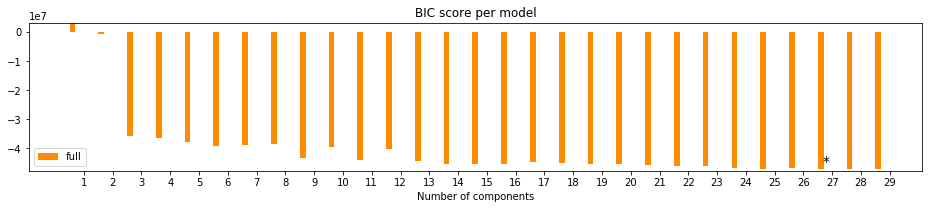

In [7]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

total_df = pd.read_csv("to_mrmr.csv")

# Generate random sample, two components
np.random.seed(0)
#C = np.array([[0., -0.1], [1.7, .4]])
#X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

df = total_df.dropna(axis=0)



normal = df[df['label']==0]
abnormal = df[df['label']==1]
feature = ['flux',
           'zero_month',
           'zero_week',
           'continuous_zero',
           'diff_week_day',
           'diff_month',
           'std_week',
           'diff_std',
           'rec_day',
           'rec_week',
           'rec_2week',
           'rec_month',
           'rec_day2',
           'rec_week2',
           'rec_2week2',
           'rec_month2', ]
X = normal.loc[:, feature].sample(frac=0.15)
#for i in range(10):
#  X = X.append(abnormal.loc[:, feature])
  
X = X.to_numpy()

print(X.shape)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 30)
cv_types = ['full']#'diag','spherical', 'tied',
for cv_type in cv_types:
    for n_components in n_components_range:
        print(n_components)
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle([#'navy', 'turquoise', #'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(16, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range, size=15)
plt.yticks(size=15)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score', size=30)
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
#plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components', size=30)
#spl.legend([b[0] for b in bars], cv_types)

Automatically created module for IPython interactive environment
(342674, 16)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


Text(0.5, 0, 'Number of components')

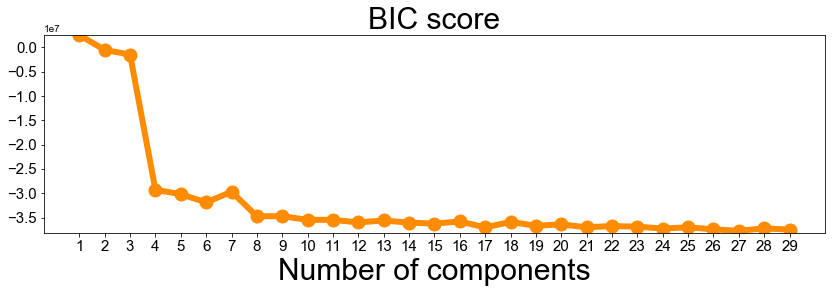

In [9]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

total_df = pd.read_csv("to_mrmr.csv")

# Generate random sample, two components
np.random.seed(0)
#C = np.array([[0., -0.1], [1.7, .4]])
#X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

df = total_df.dropna(axis=0)



normal = df[df['label']==0]
abnormal = df[df['label']==1]
feature = ['flux',
           'zero_month',
           'zero_week',
           'continuous_zero',
           'diff_week_day',
           'diff_month',
           'std_week',
           'diff_std',
           'rec_day',
           'rec_week',
           'rec_2week',
           'rec_month',
           'rec_day2',
           'rec_week2',
           'rec_2week2',
           'rec_month2', ]
X = normal.loc[:, feature].sample(frac=0.12)
#for i in range(10):
#  X = X.append(abnormal.loc[:, feature])
  
X = X.to_numpy()

print(X.shape)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 30)
cv_types = ['full']#'diag','spherical', 'tied',
for cv_type in cv_types:
    for n_components in n_components_range:
        print(n_components)
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle([#'navy', 'turquoise', #'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(14, 8))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range)
    bars.append(plt.plot(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        lw=6, marker='o', ms=13, color=color))
plt.xticks(n_components_range, size=15)
plt.yticks(size=15)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score', size=30)
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
#plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components', size=30)
#spl.legend([b[0] for b in bars], cv_types)

26


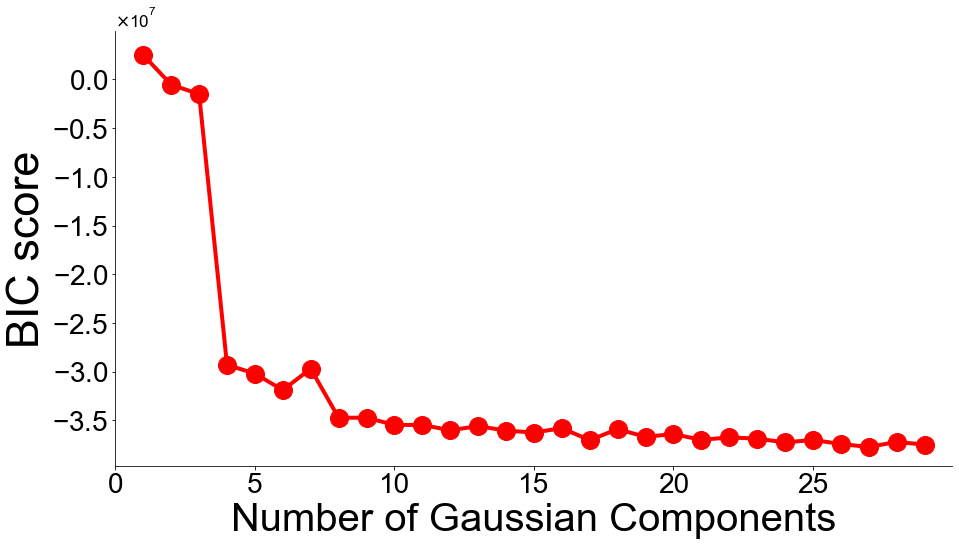

In [10]:
# Plot the BIC scores
#fpath = 'arial.ttf'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
#prop = fm.FontProperties(fname =fpath)

plt.figure(figsize=(15, 8))
spl = plt.subplot(1, 1, 1)
#c = ['darkorange' for _ in range(n_components)]
print(np.argmin(bic))
#c[np.argmin(bic)] = 'red'
#ms=14 = normal
#ms=18 = big
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range)
    bars.append(plt.plot(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        lw=4, marker='o', ms=18, color="red", mfc='red'))
    #plt.plot(xpos[np.argmin(bic):np.argmin(bic)+1], bic[np.argmin(bic):np.argmin(bic)+1],
    #                    lw=4, marker='o', ms=18, color="red", mfc='white')
plt.xticks(np.arange(0, 30, 5),
           #fontproperties=prop,
           size=28)
plt.xlim([0, 30])
plt.yticks(
  #fontproperties=prop,
  size=28)
plt.ylim([bic.min() * 1.05 - .01 * bic.max(), bic.max()*2])
plt.ylabel('BIC score',
           #fontproperties=prop,
           size=45)
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
#plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of Gaussian Components',
               #fontproperties=prop,
               size=40)
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.gca().yaxis.offsetText.set_fontsize(17)
#spl.legend([b[0] for b in bars], cv_types)
#plt.tight_layout()
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False)
plt.savefig("BIC.png")
plt.savefig("BIC.eps", format='eps')
plt.show()
